<center>
<img src="https://raw.githubusercontent.com/FUlyankin/ekenam_grand_research/master/images/cover.png">
</center>


# <center> Иканам гранд рисёрч </center>
## <center>  Часть пятая: предобработка данных </center>


Проект **Иканам гранд рисёрч** реализуется [Иканам стьюдентс коммьюнити,](https://vk.com/ikanam)
в частности [вот этим парнем по имени Филипп.](https://vk.com/ppilif)  Если вы нашли ошибку или у вас есть предложения, замечания, деньги, слава или женщины, можно ему написать. Весь говнокод, использованный в исследовании распостраняется по лицензии [Creative Commons CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/) Его можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу рисёрча.](https://github.com/FUlyankin/ekenam_grand_research) 

In [1]:
import warnings     # Игнорирование варнингов
warnings.filterwarnings("ignore")  

In [2]:
import numpy as np     # Нумпай для векторов 
import pandas as pd    # Пандас для табличек 
# Округлять в табличках значения до второго знака
pd.set_option('precision', 2)           

# Пакеты для графииков
import matplotlib.pyplot as plt                             
import seaborn as sns
plt.style.use('ggplot')   # Правильный стиль графиков   

# Пакет для красивых циклов. При желании его можно отключить. Тогда из всех циклов придётся 
# удалять команду tqdm_notebook.
from tqdm import tqdm_notebook   # подробнее: https://github.com/tqdm/tqdm

In [3]:
%matplotlib inline  

И для начала несколько определений. **Фича** - регрессор, признак, объясняющая переменная, на которую мы можем посмотреть. **Таргет** - объясняемая переменная, переменная, которую нужно спрогнозировать. **Варить фичи** - создавать из грязного массива данных годные числовые переменные, которые можно запихнуть в модель. В дальнейшем тетрадка будет устроена следующим образом:

* Раздел с варкой фичей по табличке 
    - Подраздел с варкой фичей 
    - Подраздел с проверкой гипотез и вузуализацией 

Ясное дело, что для каждой таблички будет свой собственный раздел. 

# 1. Агрегируем данные асессоров и варим таргеты 


В нашем распоряжении есть довольно много табличек с разным содержимым. Всё это содержимое надо как следует переварить. Начнём мы процесс переваривания с коллекции табличек под названием  `Total_razm`. 

`Total_razm` это набор из 6 табличек по данным о наборах с 2012 по 2017 год. Внутри находятся данные о ЕГЭ, условиях поступления, отметка на каком курсе учится человек, а также с какого курса его отчислили. Кроме того, проставлены две субъективные переменные, отражающие степень того как часто человек ходит на пары и как часто зажигает на вечеринках. Напомню, что каждую разметку проставляли независимо друг от друга несколько разных групп людей. Отдельно отметим, что данные по людям, взятым на учёбу в 2017 году, мы будем использовать для прогнозирования отчислений. 

## 1.1 Варим табличку

Подгружаем всё это добро в нашу тетрадку. 

In [4]:
# файлы, в которых лежат id и другие размеченые данные называются Total_20XX 
# Заведем вектор со всеми годами, которые есть у нас в распоряжении
file_names = ['2012','2013','2014','2015','2016','2017']
tables = [ ] # Вектор, куда мы будем записывать все уиды  (user id)

# Проходимся по всем файлам и подгружаем их
for file in file_names: 
    cur_df = pd.read_excel('../Total_razmetka/Total_' + file + '.xlsx') # В этой папке файлы...
    tables.append(cur_df)

Посмотрим на одну из табличек. 

In [5]:
tables[3].head()

,firstname,lastname,kurs_misha,kurs_ahmed,kurs_vova,Leto-zima_misha,Leto-zima_ahmed,Leto-zima_vova,Akadem_misha,Akadem_ahmed,...,tusovka_vova,EGE,dogovor,Ochko-zaochka,olimp,chelevoe,lgota,prohodnoy,year,uids
0,Гильдин,Марк,1,1.0,1.0,leto,NaN,leto,NaN,NaN,...,1.0,307,0,0,1,0,0,253,2015,1.20e+08
1,Гуров,Дмитрий,3,3.0,3.0,NaN,NaN,NaN,NaN,NaN,...,3.0,238,0,0,1,0,0,253,2015,8.53e+07
2,Касьянова,Ксения,3,3.0,3.0,NaN,NaN,NaN,NaN,NaN,...,2.0,269,0,0,1,0,0,253,2015,3.77e+07
3,Митдзиев,Азамат,1,1.0,NaN,zima,zima,NaN,NaN,NaN,...,NaN,254,0,0,0,1,0,253,2015,1.40e+08
4,Цгоева,Милана,3,3.0,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,247,0,0,0,1,0,253,2015,8.66e+07


In [6]:
tables[3].columns

Index(['firstname', 'lastname', 'kurs_misha', 'kurs_ahmed', 'kurs_vova',
       'Leto-zima_misha', 'Leto-zima_ahmed', 'Leto-zima_vova', 'Akadem_misha',
       'Akadem_ahmed', 'Akadem_vova', 'hodit_para_misha', 'hodit_para_ahmed',
       'hodit_para_vova', 'tusovka_misha', 'tusovka_ahmed', 'tusovka_vova',
       'EGE', 'dogovor', 'Ochko-zaochka', 'olimp', 'chelevoe', 'lgota',
       'prohodnoy', 'year', 'uids'],
      dtype='object')

Отлично! Берём нашу табличку и руководствуясь мудростью толпы начинаем усреднять ответы асессоров. Где-то мы будем брать медиану, где-то среднее. 

In [7]:
def table_creator(ddf):
    df = ddf.copy()
    ok_col = ['uids', 'firstname', 'lastname', 'year', 'EGE', 'prohodnoy',
     'lgota', 'chelevoe', 'olimp', 'dogovor']

    dff = df[ok_col]
    if 'Ochko-zaochka' in df.columns:
        dff['ochko-zaochka'] = df['Ochko-zaochka']
    else:
        dff['ochko-zaochka'] = [0]*df.shape[0]

    df.drop(ok_col, axis = 1, inplace=True)
    
    # Заполняем колонку курс медианой. 
    dff['kurs'] = np.nanmedian(df[[name for name in \
                            df.columns if name[:5] == 'kurs_']].get_values(), axis=1).astype(int)

    # Заполняем колонку из сессий, будем выбирать максимальную из предложенных оценок
    seazon = df[[name for name in df.columns if name[:5] == 'Leto-']].fillna(0)\
                                 .replace({'leto':1,'zima':2}).max(axis=1)
        
    dff['zima'] = [1 if z == 2 else 0 for z in seazon]
    dff['leto'] = [1 if z == 1 else 0 for z in seazon]

    # Если хотя бы раз пацаны подумали, что человек пытался вернуться (академ или восстановление), 
    # то поставим единичку 
    ak = df[[name for name in df.columns if name[:5] == 'Akade']].fillna(0).sum(axis=1)
    dff['akadem'] = [int(item > 0) for item in ak] 

    # Оценку хождения на пары и на тусовки усредним
    dff['hodit_para'] = np.nanmean(df[[name for name in df.columns if name[:5] == 'hodit']],axis=1)

    # Я тупанул и попросил часть людей ставить оценку по 3-бальной шкале, 
    # часть людей я попросил ставить оценку по 5-бальной шкале
    maxes = np.nanmax(df[[name for name in df.columns if name[:5] == 'tusov']],axis=0)
    # Поэтому сначала перенормируем, потом усредним
    dff['hodit_tusa'] = np.nanmean(df[[name for name in df.columns if name[:5] == 'tusov']]\
                                     .ix[:,maxes == 3]*5/3, axis=1)
    # исправляем косяки:
    dff['chelevoe'].fillna(0,inplace=True) # В какой-то из таблиц забыли проставить нули
    return dff

In [8]:
test_df = table_creator(tables[0])
test_df.head()

,uids,firstname,lastname,year,EGE,prohodnoy,lgota,chelevoe,olimp,dogovor,ochko-zaochka,kurs,zima,leto,akadem,hodit_para,hodit_tusa
0,1.18e+07,Данильченко,Леонид,2012,203,247,0,0,1,0,0,5,0,0,0,2.67,3.33
1,2.03e+07,Лисовская,Людмила,2012,255,247,0,0,1,0,0,5,0,0,0,3.67,3.33
2,1.55e+08,Кочеткова,Полина,2012,249,247,0,0,1,0,0,5,0,0,0,3.67,3.33
3,1.35e+08,Канаева,Дельгир,2012,242,247,1,0,0,0,0,1,0,1,0,3.33,1.67
4,1.04e+08,Климова,Екатерина,2012,203,247,1,0,0,0,0,2,1,0,1,3.67,1.67


In [9]:
total_df = table_creator(tables[0])

for tbl in tables[1:]:
    total_df = total_df.append(table_creator(tbl))

# Заполняем новый, 2017 год нанами.
total_df.ix[total_df.year == 2017,'kurs'] = None

print(total_df.shape)
total_df.head()

(460, 17)


,uids,firstname,lastname,year,EGE,prohodnoy,lgota,chelevoe,olimp,dogovor,ochko-zaochka,kurs,zima,leto,akadem,hodit_para,hodit_tusa
0,1.18e+07,Данильченко,Леонид,2012,203.0,247,0,0.0,1,0,0,5.0,0,0,0,2.67,3.33
1,2.03e+07,Лисовская,Людмила,2012,255.0,247,0,0.0,1,0,0,5.0,0,0,0,3.67,3.33
2,1.55e+08,Кочеткова,Полина,2012,249.0,247,0,0.0,1,0,0,5.0,0,0,0,3.67,3.33
3,1.35e+08,Канаева,Дельгир,2012,242.0,247,1,0.0,0,0,0,1.0,0,1,0,3.33,1.67
4,1.04e+08,Климова,Екатерина,2012,203.0,247,1,0.0,0,0,0,2.0,1,0,1,3.67,1.67


Посмотрим на размеры таблички и количество пропусков. 

In [10]:
print(total_df.shape)
total_df.isnull().sum()

(460, 17)


uids              22
firstname          0
lastname           0
year               0
EGE                8
prohodnoy          0
lgota              0
chelevoe           0
olimp              0
dogovor            0
ochko-zaochka      0
kurs              79
zima               0
leto               0
akadem             0
hodit_para        44
hodit_tusa       107
dtype: int64

Доводим нашу таблицу до ума. 

* Каждый год разный проходной балл. Построим переменную, которая будет выглядть как балл - проходной балл
* Введём дамми-переменную с незамысловатым наименованием `kozko` (поймут не все)
* Построим несколько таргетов `target_i = 1`, если человек закончил курс i, при условии что он закончил предыдущие

In [11]:
# Строим переменные 
total_df.dropna(subset=['EGE'], inplace=True)
total_df['ege_diff'] = total_df['EGE'] - total_df['prohodnoy']
total_df['kozko'] = (total_df.year == 2013)|(total_df.year == 2015)|(total_df.year == 2017)
total_df['kozko'] = total_df['kozko'].astype(int)

# Строим таргеты 
# человек закончил 1 курс 
# 1 - закончил 1 курс, 0 - нет, na - неизвестно
total_df['target_1'] = 1*(total_df.kurs > 1).astype(int)
total_df.ix[total_df.year == 2017,'target_1'] = None

# человек закончил 2 курс, при условии, что он закончил 1 
# 1 - закончил 2 курс, при условии что закончил 1, 0 - нет, na - неизвестно
# na - не поступил на 2 курс, чтобы его закончить... 
total_df['target_2'] = 1*((total_df.target_1 == 1)&(total_df.kurs > 2)).astype(int)
total_df.ix[(total_df.year > 2015)|(total_df.target_1 == 0), 'target_2'] = None

# человек закончил 3 курс, при условии, что он закончил 2
# 1 - закончил 3 курс, при условии что закончил 2, 0 - нет, na - неизвестно
total_df['target_3'] = 1*((total_df.target_2 == 1)&(total_df.kurs > 3))
total_df.ix[(total_df.year > 2014)|(total_df.target_2 == 0)|(total_df.target_1 == 0), 'target_3'] = None

# человек закончил 4 курс, при условии, что он закончил 3
# 1 - закончил 4 курс, при условии что закончил 3, 0 - нет, na - неизвестно
total_df['target_4'] = 1*((total_df.target_3 == 1)&(total_df.kurs > 4)).astype(int)
total_df.ix[(total_df.year > 2013)|\
         (total_df.target_3 == 0)|(total_df.target_2 == 0)|(total_df.target_1 == 0),'target_4'] = None


In [12]:
total_df.head()

,uids,firstname,lastname,year,EGE,prohodnoy,lgota,chelevoe,olimp,dogovor,...,leto,akadem,hodit_para,hodit_tusa,ege_diff,kozko,target_1,target_2,target_3,target_4
0,1.18e+07,Данильченко,Леонид,2012,203.0,247,0,0.0,1,0,...,0,0,2.67,3.33,-44.0,0,1.0,1.0,1.0,1.0
1,2.03e+07,Лисовская,Людмила,2012,255.0,247,0,0.0,1,0,...,0,0,3.67,3.33,8.0,0,1.0,1.0,1.0,1.0
2,1.55e+08,Кочеткова,Полина,2012,249.0,247,0,0.0,1,0,...,0,0,3.67,3.33,2.0,0,1.0,1.0,1.0,1.0
3,1.35e+08,Канаева,Дельгир,2012,242.0,247,1,0.0,0,0,...,1,0,3.33,1.67,-5.0,0,0.0,NaN,NaN,NaN
4,1.04e+08,Климова,Екатерина,2012,203.0,247,1,0.0,0,0,...,0,1,3.67,1.67,-44.0,0,1.0,0.0,NaN,NaN


Посмотрим на пропуски в данных.

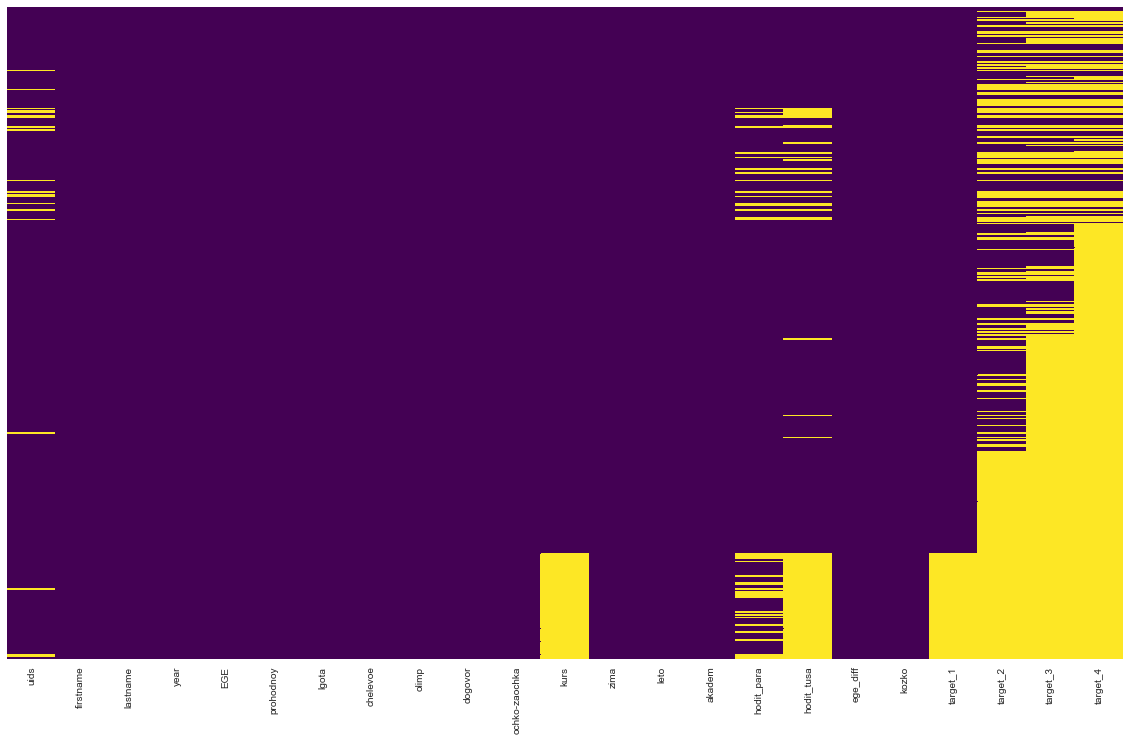

In [13]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(total_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Посмотрим на распределения таргетов. 

In [14]:
total_df.target_1.value_counts()

1.0    258
0.0    121
Name: target_1, dtype: int64

In [15]:
total_df.target_2.value_counts()

1.0    185
0.0     23
Name: target_2, dtype: int64

In [16]:
total_df.target_3.value_counts()

1.0    115
0.0     10
Name: target_3, dtype: int64

In [17]:
total_df.target_4.value_counts()

1.0    67
0.0     4
Name: target_4, dtype: int64

Строить модель, которая будет прогнозировать отчисления с первого курса будет легко и весело. У нас довольно много как положительных, так и отрицательных примеров. С прогнозированием отчисление со второго, третьего и четвёртого курса, у нас будет довольно много проблем. Модель мы будем строить по 379 наблдюдениям. 

In [18]:
sum(total_df.year != 2017)

379

Прогнозы мы будем строить для 73 первокурсников. 

In [19]:
sum(total_df.year == 2017)

73

Сохраняем первый, самый простой датасет. 

In [20]:
!pwd

/Users/fulyankin/Documents/ekanam_grand_research/5. Data prepare


In [21]:
total_df.to_csv('data1_simple.csv', sep = '\t')

In [22]:
!ls

data1_simple.csv     data4_prof_ph_wl.csv data_all_wl.csv
data2_prof.csv       data_all_photo.csv   data_prepare.ipynb
data3_prof_ph.csv    data_all_prof.csv    variables.csv


In [23]:
total_df.shape

(452, 23)

## 1.2 Проверяем гипотезу десятилетия 

Во-первых, заметим, что люля людей, которые заканчивают первый курс равна примерно $2/3$.  

In [24]:
stat = total_df.target_1.value_counts()
stat[1]/(stat[0] + stat[1])

0.68073878627968343

Ахмед, Лёша. Добро пожаловать в этот раздел. Сейчас я собираюсь уничтожить всё, что вам действительно дорого. Пришло время развеять один очень важный миф, который поселился среди студентов иканама:  

> Когда матан читает Козко, с первого курса отчисляют больше людей. 

Сформулируем гипотезу. 

$H_0\colon$ в среднем людей отчисляют одинаково, $p_{k} = p_{ch}$

$H_1\colon$ ничего подобного, $p_{k} \ne p_{ch}$

Для проверки гипотезы возьмём 2012, 2013, 2014 и 2015 года. 

In [25]:
kozko_df = total_df.dropna(subset=['target_1'])
x_kozko = 1 -kozko_df[(kozko_df.kozko == 1)&(kozko_df.year != 2016)].target_1
x_nekozko = 1 - kozko_df[(kozko_df.kozko == 0)&(kozko_df.year != 2016)].target_1

print('Вероятность не закончить 1 курс при Козко:',   sum(x_kozko)/len(x_kozko))
print('Вероятность не закончить 1 курс при Чирском:', sum(x_nekozko)/len(x_nekozko))

Вероятность не закончить 1 курс при Козко: 0.3496932515337423
Вероятность не закончить 1 курс при Чирском: 0.296551724137931


Чтобы всё было максимально прозрачно, напишем свою функцию для проверки гипотезы, руководствуясь лекциями Палыча.

In [26]:
import scipy

def proportions_diff_z_stat_ind(sample1, sample2):
    '''
    Функция, написанная по лекциям Палыча
    
    '''
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    '''
    функция для расчта p-value при разных альтернативах
    
    '''
    
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

Мы готовы к проверке. 

In [27]:
proportions_diff_z_test(proportions_diff_z_stat_ind(x_kozko, x_nekozko))

0.32014582359010602

Альтернатива должна быть $p_k > p_{ch}$? Окей. 

In [28]:
proportions_diff_z_test(proportions_diff_z_stat_ind(x_kozko, x_nekozko),'greater')

0.16007291179505301

Результат не поменялся. Гипотеза о равенстве долей не отвергается. Можно попробовать не выкидывать "лишний год" и проверять гипотезу на 3-х годах Чирского и двух годах Козко. 

In [29]:
kozko_df = total_df.dropna(subset=['target_1'])
x_kozko = 1 -kozko_df[(kozko_df.kozko == 1)].target_1
x_nekozko = 1 - kozko_df[(kozko_df.kozko == 0)].target_1

print('Вероятность не закончить 1 курс при Козко:',   sum(x_kozko)/len(x_kozko))
print('Вероятность не закончить 1 курс при Чирском:', sum(x_nekozko)/len(x_nekozko))

proportions_diff_z_test(proportions_diff_z_stat_ind(x_kozko, x_nekozko))

Вероятность не закончить 1 курс при Козко: 0.3496932515337423
Вероятность не закончить 1 курс при Чирском: 0.2962962962962963


0.26960949655974931

Напомню, что в других преподах между двумя первыми курсами различий нет. Мораль всего этого проста: __Если ты тупой, неважно кто читает у тебя матан.__  Скорее всего, вы мне предложите дождаться результатов по отчислениям за этот год, а после перепроверить гипотезу. Друзья, я в курсе, что вы ходите принимать колки по матану. Неужели вы способны для того, чтобы доказать свою точку зрения поставить лишние двойки? 

Посмотрим на матрицу корреляций для нашей таблички. 

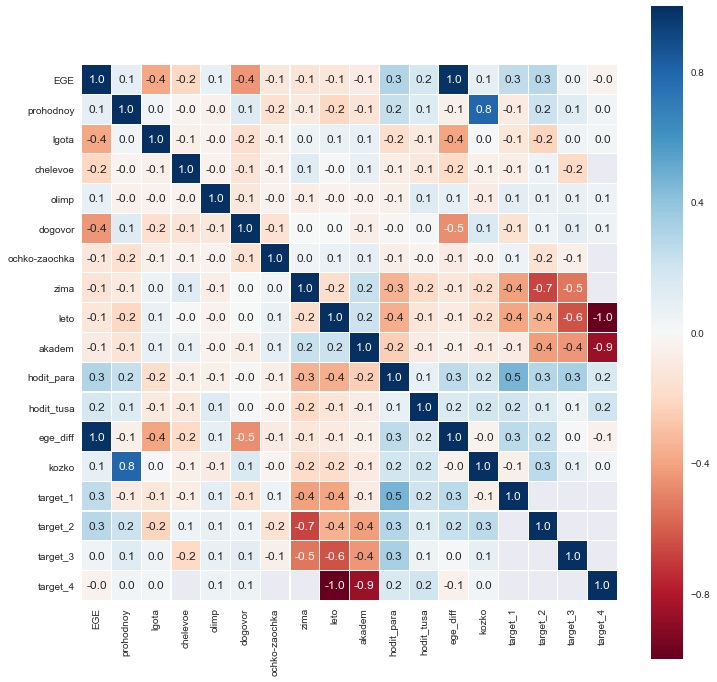

In [30]:
plt.subplots(figsize=(12, 12))
sns.heatmap(total_df.drop(['year','uids','kurs'],axis=1).corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Вопрос на засыпку для читателя: почему некоторые области остались серыми и правильно ли это. 

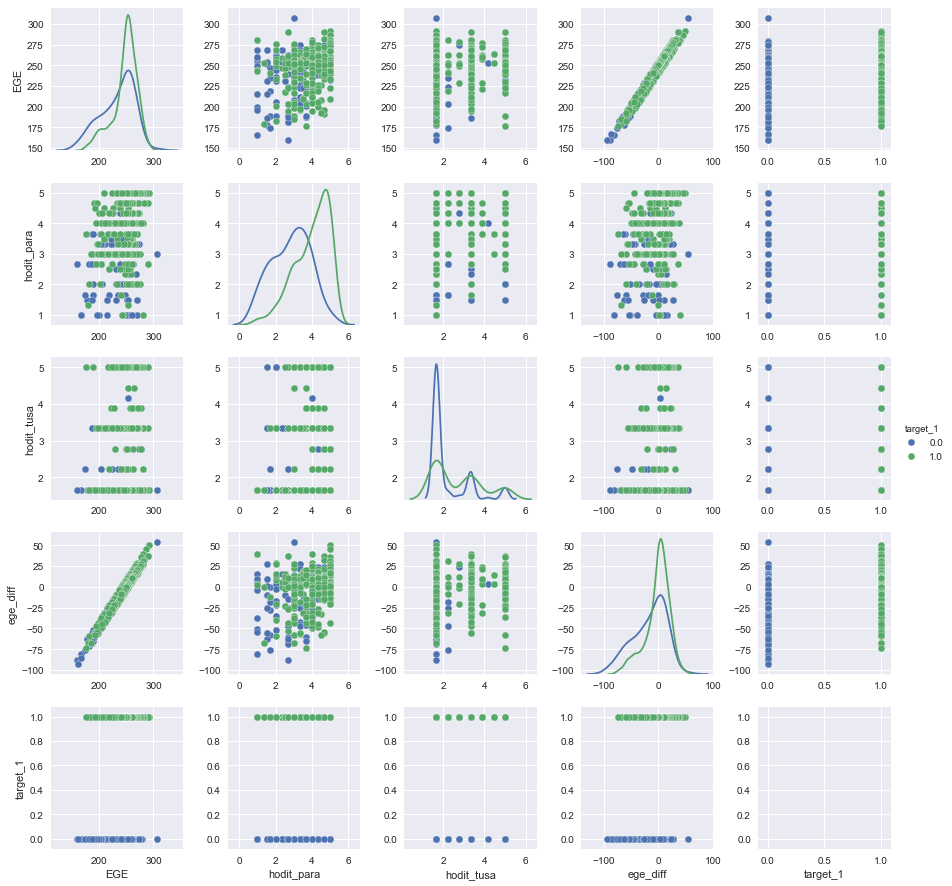

In [31]:
regr = ['EGE', 'hodit_para', 'hodit_tusa', 'ege_diff', 'target_1']
sns.pairplot(total_df[regr], hue = 'target_1', diag_kind="kde")

Видим, что баллы за ЕГЭ не в среднем никак не говорят об отчисляемости. При этом те, кого отчисляют, судя по всему, в среднем ходят на пары реже. Не будем забывать, что показатель, отвечающий за хождение на пары, проставляли асессоры. Они могли ставить более низкие оценки тем ребятам, которых отчислили чисто психологически. 

На последок посмотрим сколько людей отчислили летом, а сколько зимой. 

In [32]:
print('Отчислили летом:',   sum(total_df.leto))
print('Отчислили зимой:', sum(total_df.zima))

Отчислили летом: 69
Отчислили зимой: 65


# 2. Данные по профилям вк 

Добавим к общему пулу из данных всё то добро, что мы вытащили из профилей людей вконтакте. 

In [33]:
df_pr = pd.read_csv('../1.Download_vk_data/vk_data_profile_v18-12-17.csv', sep = '\t', index_col=0)
df_pr.shape

(707, 56)

Сразу же избавимся от людей, которые оказались забанены или удалили свою страницу. 

In [34]:
df_pr.deactivated_dummy.value_counts()

0          674
deleted     28
banned       5
Name: deactivated_dummy, dtype: int64

In [35]:
df_pr = df_pr[df_pr.deactivated_dummy == '0']
df_pr.drop('deactivated_dummy',axis=1,inplace=True)
df_pr.shape

(674, 55)

Отлично! $674$ человека, $55$ переменных. Как вы помните, в данных по профилям было очень много пропусков. Попробуем их визуализировать. Жёлтое - в переменной есть пропуск. Лиловое - в переменной нет пропуска. 

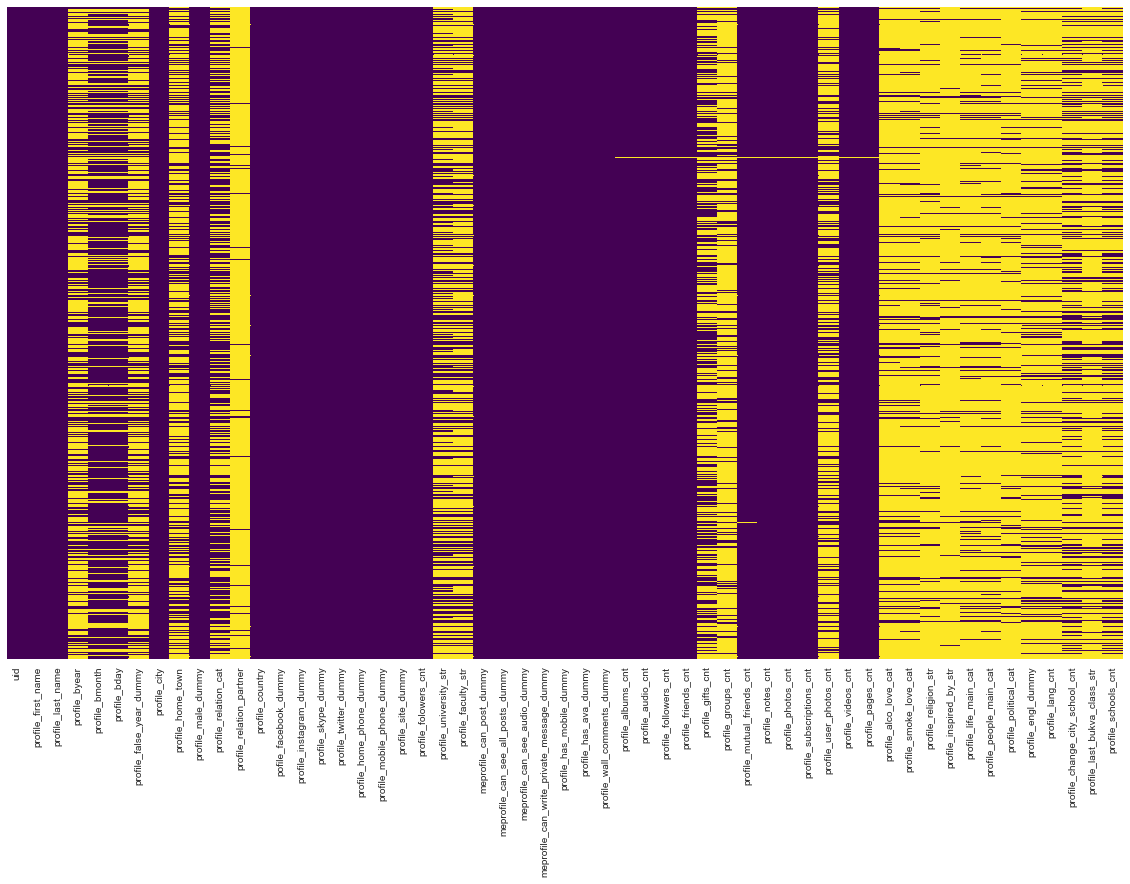

In [36]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df_pr.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0,0.5,'Число переменных')

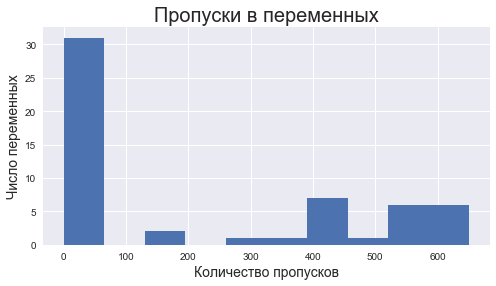

In [37]:
plt.figure(figsize=(8,4))
plt.hist(df_pr.isnull().sum()) 
plt.title('Пропуски в переменных', fontsize=20)
plt.xlabel('Количество пропусков', fontsize=14)
plt.ylabel('Число переменных', fontsize=14)

## 2.1 Обработка пропусков

Посмотрим что за пропуски такие и в каких переменных они встречаются. 

### 2.1.1 Переменные без пропусков 

In [38]:
vr_0 = [item for item in df_pr.columns if df_pr[item].isnull().sum() == 0]
print(len(vr_0))
vr_0

21


['uid',
 'profile_first_name',
 'profile_last_name',
 'profile_city',
 'profile_male_dummy',
 'profile_country',
 'pofile_facebook_dummy',
 'profile_instagram_dummy',
 'profile_skype_dummy',
 'profile_twitter_dummy',
 'profile_home_phone_dummy',
 'profile_mobile_phone_dummy',
 'profile_site_dummy',
 'profile_folowers_cnt',
 'meprofile_can_post_dummy',
 'meprofile_can_see_all_posts_dummy',
 'meprofile_can_see_audio_dummy',
 'meprofile_can_write_private_message_dummy',
 'profile_has_mobile_dummy',
 'profile_has_ava_dummy',
 'profile_wall_comments_dummy']

Без пропусков оказалась 21 переменная. Перевариваем их. 

In [39]:
df_pr_clean = pd.DataFrame( )  # Чистая табличка для переваренного добра 

In [40]:
# уид, имя и фамилию оставляем без изменений 
df_pr_clean['uids'] = df_pr['uid']
df_pr_clean['profile_first_name'] = df_pr['profile_first_name']
df_pr_clean['profile_last_name'] = df_pr['profile_last_name']

# переменная с городом проживания
# чаще всего он либо не указан, либо это Москва, преобразуем колонку в две дамми переменные
# возможно, имеет смысл сделать отедльную дамми на крупные города, но мне влом
df_pr_clean['profile_city_moscow_dummy'] = 1*(df_pr['profile_city'] == 'Москва')
df_pr_clean['profile_city_none_dummy'] = 1*(df_pr['profile_city'] == 'Город не указан')

# Страну также разбиваем на несколько дамми 
df_pr_clean['profile_country_russia_dummy'] = 1*(df_pr.profile_country == 'Россия' )
df_pr_clean['profile_country_none_dummy'] = 1*(df_pr.profile_country == 'Страна не указана')

# Число подписчиков 
df_pr_clean['profile_folowers_cnt'] = df_pr.profile_folowers_cnt

##### Много разных дамми-пеерменных ######

# Пол, указанный вк оставляем без изменений 
df_pr_clean['profile_male_dummy'] = df_pr.profile_male_dummy

# Есть ли у человека аватар 
df_pr_clean['profile_has_ava_dummy'] = df_pr.profile_has_ava_dummy

# Открыта ли стена для комментов 
df_pr_clean['profile_wall_comments_dummy'] = df_pr.profile_wall_comments_dummy

# Указана ли вк ссылка на facebook (указана у 19 человек)
df_pr_clean['profile_facebook_dummy'] = df_pr.pofile_facebook_dummy

# Указана ли ссылка на инстаграмм (указана у 135 человек)
df_pr_clean['profile_instagram_dummy'] = df_pr.profile_instagram_dummy

# Указана ли ссылка на skype (указана у 103 человек)
df_pr_clean['profile_skype_dummy'] = df_pr.profile_skype_dummy

# Указана ли ссылка на twitter (указана у 37 человек)
df_pr_clean['profile_twitter_dummy'] = df_pr.profile_twitter_dummy

# Указан ли домашнией телефон (указан у 39 человек)
df_pr_clean['profile_home_phone_dummy'] =  df_pr.profile_home_phone_dummy

# Указан ли у человека мобильник (указан у 125 человек) 
df_pr_clean['profile_mobile_phone_dummy'] =  df_pr.profile_mobile_phone_dummy

# указан ли какой-нибудь сайт (указан у 94 человек)
df_pr_clean['profile_site_dummy'] = df_pr.profile_site_dummy

##### немного странные дамми-переменные ###### 

# могу ли я писать на и комментиоровать стену (454 нет)
df_pr_clean['meprofile_can_post_dummy'] = df_pr.meprofile_can_post_dummy

# могу лия видеть все посты (352 нет)
df_pr_clean['meprofile_can_see_all_posts_dummy'] = df_pr.meprofile_can_see_all_posts_dummy

# могу ли я видеть аудио (416 нет)
df_pr_clean['meprofile_can_see_audio_dummy'] = df_pr.meprofile_can_see_audio_dummy

# могу ли я писать в личку  (62 нет)
df_pr_clean['meprofile_can_write_private_message_dummy'] = df_pr.meprofile_can_write_private_message_dummy

# Выбрасываем :  'profile_has_mobile_dummy'

Надежды и пояснения: 

* Скорее всего, все поля в телефонах и ссылках на разные соц сетки заполняют только троли. Обычно, они там должны отсавлять всякие глупости. Наличие дамми о заполненности этих полей помогут выявить рофлеров.
* Наличие данных о том кому я могу писть и чьи аудио я вижу, говорят про отношение человека к приватности. Интересно будет узнать как более "приватные" люди проявляют себя в учёбе. Скорее всего, в процесси построения модели, половину этих дамми придётся выбросить. 


### 2.1.2 Не более 100 пропусков 

А мы тем временем переходим к данным, в которых есть мене сотни пропусков. В основном, это переменные-счётчики. Все их нам бы хотелось оставит в выборке. В каждой из них не более двух пропусков. У людей закрыты страницы. Приватность так приватность, заполним эти пропуски нулями.

In [41]:
vr_100 = [item for item in df_pr.columns if 0 < df_pr[item].isnull().sum() < 100]
vr_100

['profile_albums_cnt',
 'profile_audio_cnt',
 'profile_followers_cnt',
 'profile_friends_cnt',
 'profile_mutual_friends_cnt',
 'profile_notes_cnt',
 'profile_photos_cnt',
 'profile_subscriptions_cnt',
 'profile_videos_cnt',
 'profile_pages_cnt']

In [42]:
df_pr_clean[vr_100] =  df_pr[vr_100].fillna(0)

Движемся по числу пропусков дальше. 

### 2.1.3 От 100 до 300 пропусков 

In [43]:
vr_300 = [item for item in df_pr.columns if 100 < df_pr[item].isnull().sum() < 300]
vr_300

['profile_bmonth', 'profile_bday', 'profile_relation_cat']

In [44]:
print(df_pr.profile_bmonth.isnull().sum())
print(df_pr.profile_bday.isnull().sum())
print(df_pr.profile_relation_cat.isnull().sum())
df_pr[vr_300].head()

148
148
299


,profile_bmonth,profile_bday,profile_relation_cat
0,9.0,27.0,не указано
1,4.0,18.0,NaN
2,2.0,13.0,не указано
3,NaN,NaN,не указано
4,NaN,NaN,NaN


Все переменные категориальные с большим числом пропусков.  Мы условились, что пока что не будем их трогать. 

In [45]:
df_pr_clean['profile_bmonth_cat'] = df_pr.profile_bmonth
df_pr_clean['profile_bday_cat'] = df_pr.profile_bday

# заменяем все NaN на не указано и оставляем переменную категориальной 
df_pr_clean['profile_relation_cat'] = df_pr['profile_relation_cat'].fillna('не указано')

### 2.1.4 От 300 до 400 пропусков 

Не думаю, что эта информация окажется поллезной. Тем не менее, мы продолжаем двигаться вперёд, по всем нашим пропускам. 

In [46]:
vr_300 = [item for item in df_pr.columns if 300 < df_pr[item].isnull().sum() < 400]
vr_300

['profile_university_str', 'profile_gifts_cnt']

In [47]:
df_pr.profile_university_str.value_counts()

РАНХиГС при Президенте РФ (АНХ при Правительстве РФ, РАГС при Президенте РФ)    214
МФТИ (ГУ)                                                                        36
НИУ ВШЭ (ГУ-ВШЭ)                                                                  6
МГУ                                                                               4
РУДН                                                                              2
СПбГУ                                                                             2
ВСГУТУ (бывш. ВСГТУ)                                                              1
МГУИЭ (бывш. МИХМ, ныне в сост. МАМИ)                                             1
СПбГУГА                                                                           1
Московский политехнический университет (МАМИ и МГУП)                              1
МГОУ (КФ)                                                                         1
РГУИТП                                                                      

Преобразуем переменную, которая отвечает за ВУЗ в три дамми. Скорее всего тот факт, что кто-то не указал на своей страничке в качестве вуза __Российскую академию народного хозяйствао и государственной сложбы при президенте Российской Федерации,__ о чём-то говорит. Наши стешняшки <3 

In [48]:
# Дамми для ранепы
df_pr_clean['profile_vuz_ranepa_yes_dummy'] = \
1*(df_pr.profile_university_str == 'РАНХиГС при Президенте РФ (АНХ при Правительстве РФ, РАГС при Президенте РФ)')

# Дамми для пропусков 
df_pr_clean['profile_vuz_none_dummy'] = 1*(df_pr.profile_university_str.isnull())

# Всё остальное - другие вузы. Мы не должны попасть в дамми-ловушку! 

# Пропуски в подарках заполняем нулями 
df_pr_clean['profile_gifts_cnt'] = df_pr.profile_gifts_cnt.fillna(0)

### 2.1.5 От 400 до 500 пропусков 

Переходим к переменным, для которых число пропусков очень велико.

In [49]:
vr_400 = [item for item in df_pr.columns if 400 < df_pr[item].isnull().sum() < 500]
vr_400

['profile_byear',
 'profile_false_year_dummy',
 'profile_home_town',
 'profile_faculty_str',
 'profile_user_photos_cnt',
 'profile_change_city_school_cnt',
 'profile_schools_cnt']

In [50]:
df_pr[vr_400].head()

,profile_byear,profile_false_year_dummy,profile_home_town,profile_faculty_str,profile_user_photos_cnt,profile_change_city_school_cnt,profile_schools_cnt
0,1997.0,0.0,Кострома,Экономический факультет,96.0,2.0,2.0
1,1993.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1917.0,1.0,"Залупкино, Московская область",NaN,0.0,1.0,1.0
3,NaN,NaN,Белгород,NaN,3.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Всё, что отвечает за год рождения, выкидываем 

# Дамми отвечающая за то является ли москва для человека родным городом 
df_pr_clean['profile_moscow_hometown_dummy'] = 1*(df_pr.profile_home_town == 'Москва')

# Указан ли в профиле иканам 
df_pr_clean['profile_econom_yes_dummy'] = 1*(df_pr.profile_faculty_str == 'Экономический факультет')

# Сколько фоток у юзера в профиле 
df_pr_clean['profile_photos_cnt'] = df_pr.profile_user_photos_cnt.fillna(0)

# Информация про школу 
# Человек столько раз при смене школы поменял город. Переменная - категориальная
df_pr_clean['profile_change_city_school_cat'] = df_pr.profile_change_city_school_cnt
# Человек поменял в принципе школу столько раз. Переменная - категориальная
df_pr_clean['profile_schools_cat'] = df_pr.profile_schools_cnt

### 2.1.6 От 500 пропусков 

Больше всего пропусков в самых интересных переменных, отвечающих за политические взгляды, отношение к куреню и прочие подобные вещи. Все такие категориальные фичи мы оставим без изменений. Интересно будет посмотреть на людей, которые указываи о себе хоть что-то. В конечном счёте мы выбросим все эти переменные из рассмотрения сразу после визуализаций. 

In [52]:
vr_500 = [item for item in df_pr.columns if df_pr[item].isnull().sum() > 500]
vr_500

['profile_relation_partner',
 'profile_groups_cnt',
 'profile_alco_love_cat',
 'profile_smoke_love_cat',
 'profile_religion_str',
 'profile_inspired_by_str',
 'profile_life_main_cat',
 'profile_people_main_cat',
 'profile_political_cat',
 'profile_engl_dummy',
 'profile_lang_cnt',
 'profile_last_bukva_class_str']

In [53]:
# Дамми, равная 1, если указан партнёр по отношениям
df_pr_clean['profile_relation_partner_yes_dummy'] = 1- 1*(df_pr.profile_relation_partner.isnull())

# Дамми, равная 1, если человек скрыл группы (не паблики)
df_pr_clean['profile_group_hide_dummy'] = 1*(df_pr.profile_groups_cnt.isnull())
# Число групп, в которых состоит человек. Пропуски заполнены нулями
df_pr_clean['profile_group_hide_dummy'] = df_pr.profile_groups_cnt.fillna(0)

# Указан ли английский язык как второй в профиле 
df_pr_clean['profile_engl_dummy'] = 1*(df_pr.profile_engl_dummy == 1)

# Число языков, которое указано в профиле. Пропуски - 0. Ничего же не указано... 
df_pr_clean['profile_lang_cnt'] = df_pr.profile_lang_cnt.fillna(0)

# Все категориальные фичи оставляем без изменений, чтобы потом поугарать 
cat_var = ['profile_alco_love_cat','profile_smoke_love_cat','profile_life_main_cat',
           'profile_people_main_cat','profile_political_cat'] 

df_pr_clean[cat_var] = df_pr[cat_var]

# Поугараем над тем кто какую религию и веру указал у себя в профиле и выбросим эти переменные
# Переменная, отвечающая за букву класса сварилась плохо, её также выкидываем 

In [54]:
df_pr.profile_religion_str.value_counts()

Православие                                                           26
Светский гуманизм                                                      8
Буддизм                                                                5
Ислам                                                                  4
Атеизм                                                                 4
Пастафарианство                                                        3
Orthodoxy                                                              3
атеист                                                                 2
†                                                                      1
Христианство и православие                                             1
Деизм                                                                  1
Хованщина                                                              1
верю в силу мозга                                                      1
Birdy magazine                                     

In [55]:
df_pr.profile_inspired_by_str.value_counts()

-                                                                                                                                                                                            1
Vox Popular-Vox Dei                                                                                                                                                                          1
Близкие люди, книги, фильмы                                                                                                                                                                  1
Молоко                                                                                                                                                                                       1
Музыка                                                                                                                                                                                       1
Книги, люди, музыка                          

Сохраним таблицу в двух форматах. Данные по профилям, по всем людям и в объединении с базовой таблицей. 

In [71]:
df_pr_clean.to_csv('data_all_prof.csv', sep='\t', index=False, header=True)
print(df_pr_clean.shape)

# Объединяем с первой табличкой 
total_df_1 = pd.merge(total_df, df_pr_clean, on = 'uids', how='inner')
print(total_df_1.shape)

total_df_1.to_csv('data2_prof.csv', sep='\t', index=False, header=True)

(674, 51)
(418, 73)


## 2.2 Визуализации и гипотезы 

гипотезы: 

* доля пацанов и телок от курса к курсу, кого чаще отчисляют 

# 3. Данные по фоткам 

## 3.1 Заполняем пропуски 

По фотографиям мы сварили не очень большое, но довольно хорошо заполненное число переменных. Посмотрим на них чуть более подробно. Все созданные нами при скачке данных переменные, в основном, являются счётчиками. В связи с этим заполним все пропуски нулями. 

In [73]:
df_ph = pd.read_csv('../1.Download_vk_data/vk_photo_data_v18-12-17.csv', sep = '\t', index_col=0)
print('С удалёнными:', df_ph.shape)

# Убрали удалённые странички 
df_ph = pd.merge(df_ph, df_pr[['uid']], on = 'uid', how='right')
print('Без удалённых:', df_ph.shape) 

С удалёнными: (707, 19)
Без удалённых: (674, 19)


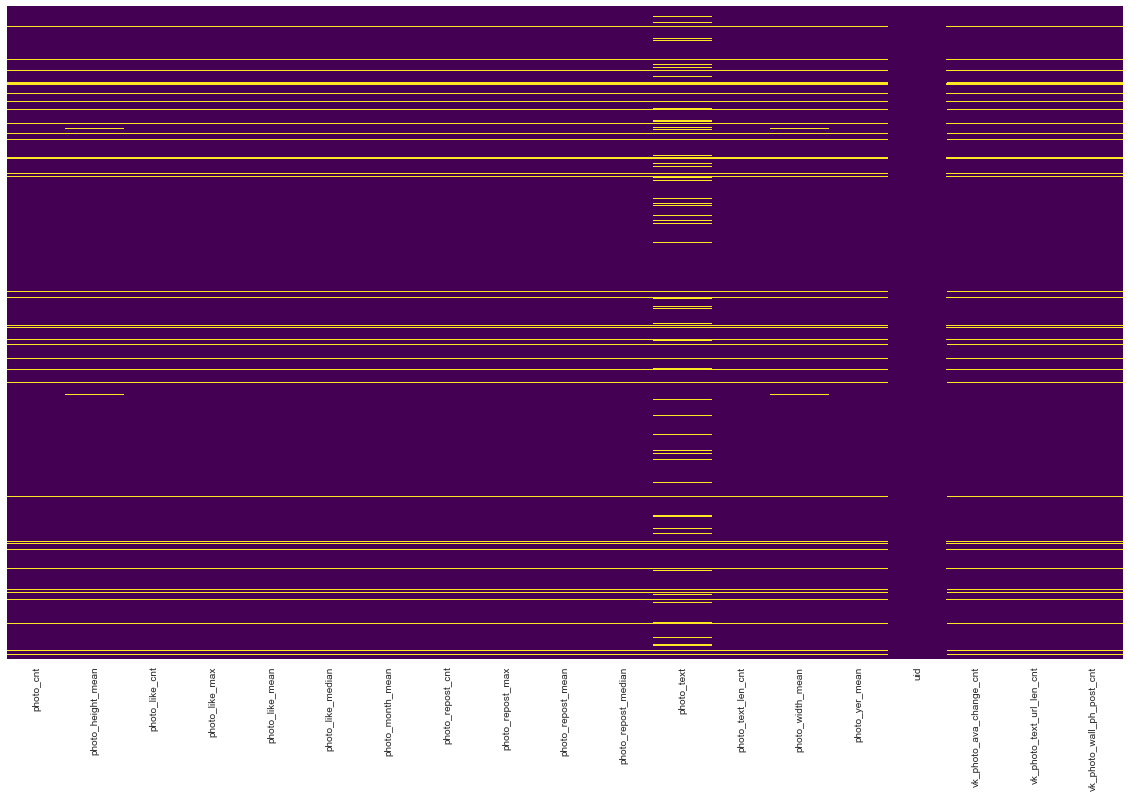

In [74]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df_ph.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0,0.5,'Число переменных')

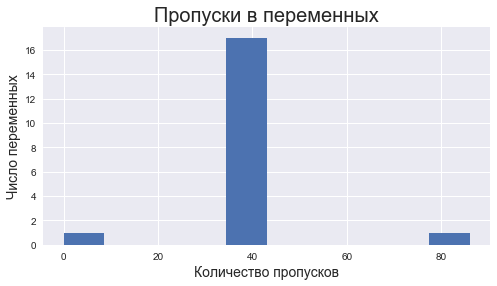

In [75]:
plt.figure(figsize=(8,4))
plt.hist(df_ph.isnull().sum()) 
plt.title('Пропуски в переменных', fontsize=20)
plt.xlabel('Количество пропусков', fontsize=14)
plt.ylabel('Число переменных', fontsize=14)

In [76]:
df_ph_clean = pd.DataFrame() 
 
variables = ['photo_cnt', 'photo_height_mean',   'photo_width_mean',   'photo_like_max',   'photo_like_mean', 
         # Число фоток     средняя высота фото  средняя ширина фото   максимально лайков    средне лайков      
         #                     (лол што)             (ЗАЧЕМ)              под фото             под фото 

        'photo_like_median', 'photo_repost_cnt',  'photo_repost_max',  'photo_repost_mean', 'photo_repost_median',
         # медиана лайков       число репостов       максимально            среднее              медиана  
       
        'vk_photo_ava_change_cnt', 'vk_photo_wall_ph_post_cnt',     'photo_text_len_cnt',      
         # сколько аватарок            сколько фоток на стене       длина подписей под фото 
         
         'vk_photo_text_url_len_cnt',   'photo_month_mean',        'photo_yer_mean']
         # длина ссылок под фото       в среднем выложил фоток    в среднем выложил фоток
         #                                  за месяц                  за год 
 
 # все пропуски заполняем нулями
df_ph_clean[variables] = df_ph[variables].fillna(0)
df_ph_clean['uids'] = df_ph['uid']

Текст, который обычно оставляют под фотками, и который мы тоже скачали, сам по себе проигнорируем. 

In [77]:
df_ph['photo_text'][:20]

0                Создано в приложение ФотоСтатус - v...
1                                                      
2                                                      
3           лето**          Мамуля ...)             ...
4          Я выиграл партию в монополию vk.com/magna...
5                                                   ...
6                               by Valeriya Pavlova ...
7                                                      
8            Коллекция: Готическая комната. Шляпа- У...
9                                                      
10                                                     
11                                                  NaN
12     Original: http://cs413126.vk.me/v413126772/29...
13      2017, Бангкок.  Местечко во дворце короля 20...
14                                                  ...
15                                                  ...
16                                                  ...
17                                              

Сохраняем данные по фоткам в виде двух табличек. Вместе с основной и как отдельную. 

In [78]:
# Отдельно 
df_ph_clean.to_csv('data_all_photo.csv', sep='\t', index=False, header=True)
print(df_ph_clean.shape)

# Объединяем
total_df_2 = pd.merge(total_df_1, df_ph_clean, on = 'uids', how='inner')
print(total_df_2.shape)

total_df_2.to_csv('data3_prof_ph.csv', sep='\t', index=False, header=True)

(674, 17)
(418, 89)


## 3.2 Визуализации и гипотезы 

# 4. Данные по стенам  

## 4.1 Заполняем пропуски 

In [79]:
df_wl = pd.read_csv('../1.Download_vk_data/vk_wall_data_v18-12-17.csv', sep = '\t', index_col=0)
print('С удалёнными:', df_wl.shape)

# Убрали удалённые странички 
df_wl = pd.merge(df_wl, df_pr[['uid']], on = 'uid', how='right')
print('Без удалённых:', df_wl.shape) 

С удалёнными: (707, 108)
Без удалённых: (674, 108)


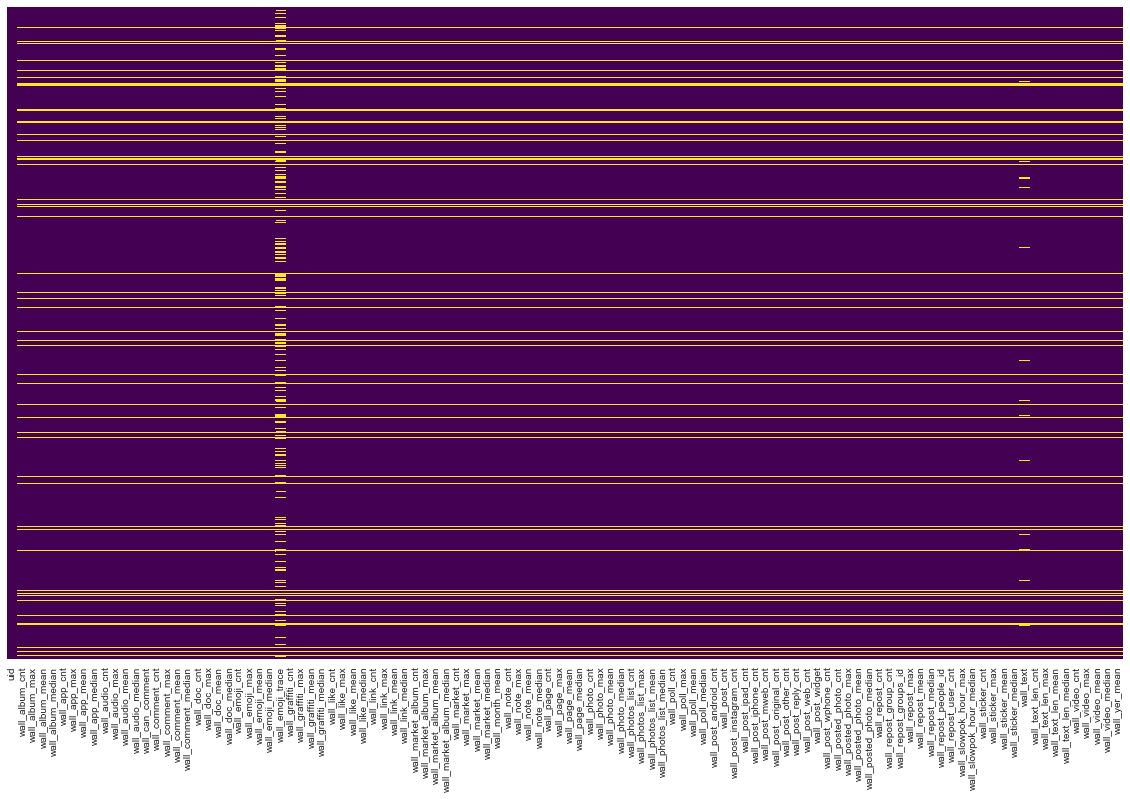

In [80]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df_wl.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0,0.5,'Число переменных')

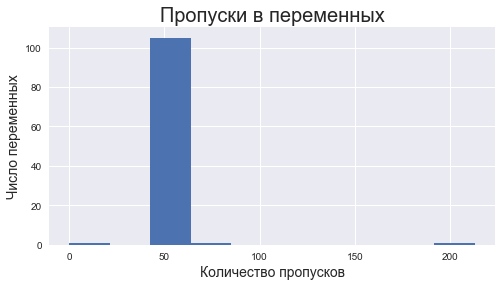

In [81]:
plt.figure(figsize=(8,4))
plt.hist(df_wl.isnull().sum()) 
plt.title('Пропуски в переменных', fontsize=20)
plt.xlabel('Количество пропусков', fontsize=14)
plt.ylabel('Число переменных', fontsize=14)

Дву сотни пропусков находится в переменной, которая называется `emoji_trace`...  Трэшаком мы уже занимались, здесь мы проигнорируем эту переменную. Также проигнорируем `wall_text`.

Пройдёмся по всем остальным переменным. Как и в прошлом случае, там, по большей части, одни счётчики. Поэтому будем заполнять все пропуски нулями. 

In [82]:
df_wl['uids'] = df_wl['uid']
df_wl.drop(['wall_text','wall_emoji_trace','uid'],axis=1,inplace=True)
df_wl = df_wl.fillna(0)
df_wl.head()

,wall_album_cnt,wall_album_max,wall_album_mean,wall_album_median,wall_app_cnt,wall_app_max,wall_app_mean,wall_app_median,wall_audio_cnt,wall_audio_max,...,wall_text_len_cnt,wall_text_len_max,wall_text_len_mean,wall_text_len_median,wall_video_cnt,wall_video_max,wall_video_mean,wall_video_median,wall_yer_mean,uids
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,9.0,...,6101.0,830.0,61.63,17.0,8.0,7.0,0.08,0.0,16.50,2.23e+07
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,...,4303.0,3961.0,172.12,0.0,0.0,0.0,0.00,0.0,8.33,2.95e+08
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,1171.0,1014.0,146.38,0.5,0.0,0.0,0.00,0.0,4.00,1.74e+08
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,5.0,...,25370.0,2588.0,74.40,45.0,16.0,5.0,0.05,0.0,48.71,1.37e+08
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,5771.0,5771.0,1923.67,0.0,1.0,1.0,0.33,0.0,1.00,4.72e+07


Снова сохраняем всё в виде двух табличек. 

In [83]:
# Отдельно 
df_wl.to_csv('data_all_wl.csv', sep='\t', index=False, header=True)
print(df_wl.shape)

# Объединяем
total_df_3 = pd.merge(total_df_2, df_wl, on = 'uids', how='inner')
print(total_df_3.shape)

total_df_3.to_csv('data4_prof_ph_wl.csv', sep='\t', index=False, header=True)

(674, 106)
(418, 194)


## 4.2 Немного статитсики и визуализаций 

Напомню, что на стенках, под постами, подписывается с какого устройства сделан пост. На основе этой информации можно оценить долю яблочников на иканаме. 

# 5. Кластеры по пабликам 

Сделать отдельный блокнот с названием трэш

* эмодзи-следы людей 
* эмодзи-сдеды групп 
* кластеризация эмодзи 
* топы групп по числу эмодзи и по их разнообразию 

* Тексты под фотками, их кластеризация 
* Тексты стен и их кластеризция 
* Репосты и паблосы 
